In [2]:
import pandas as pd

df = pd.read_csv("/Users/wang/Downloads/Heart_disease_cleveland_new.csv")

print(df.shape)
print(df.columns)
print(df['target'].value_counts())

(303, 14)
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='str')
target
0    164
1    139
Name: count, dtype: int64


In [3]:
from sklearn.tree import DecisionTreeClassifier

X = df.drop("target", axis=1)
y = df["target"]

model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X, y)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",3
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current no

In [4]:
import numpy as np

importance = pd.Series(model.feature_importances_, index=X.columns)
print(importance.sort_values(ascending=False))

thal        0.495922
cp          0.236688
ca          0.175918
trestbps    0.046317
oldpeak     0.045155
age         0.000000
sex         0.000000
chol        0.000000
fbs         0.000000
restecg     0.000000
thalach     0.000000
exang       0.000000
slope       0.000000
dtype: float64


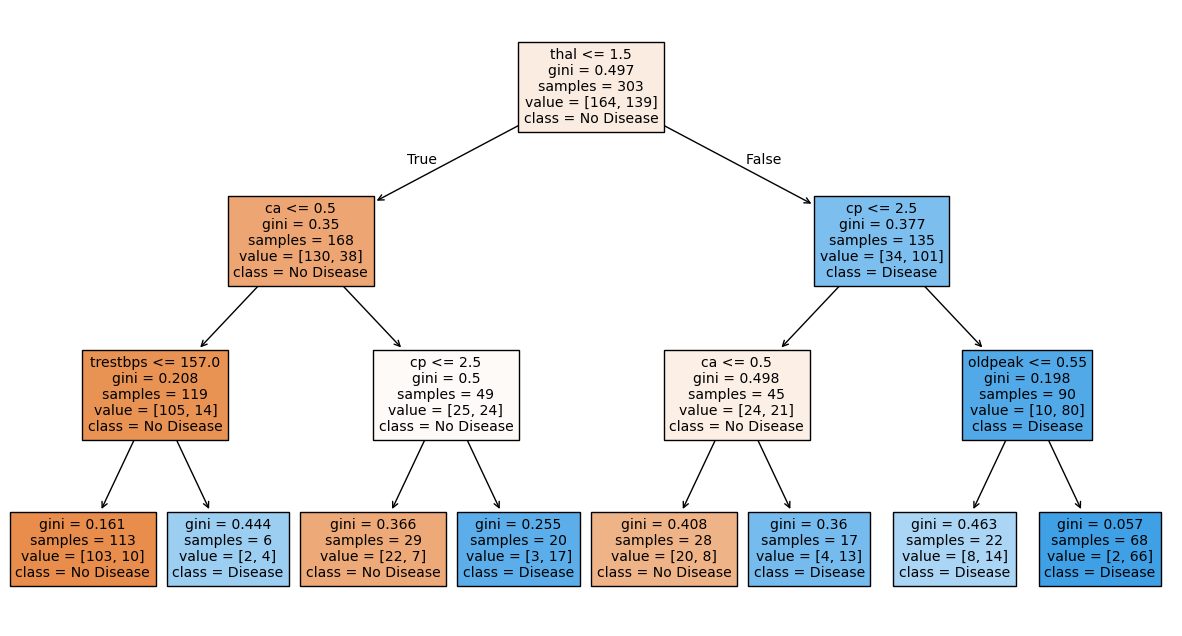

In [6]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plot_tree(model,
          feature_names=X.columns,
          class_names=["No Disease", "Disease"],
          filled=True)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=["No Disease","Disease"]))

Test accuracy: 0.8688524590163934
Confusion matrix:
 [[29  4]
 [ 4 24]]
              precision    recall  f1-score   support

  No Disease       0.88      0.88      0.88        33
     Disease       0.86      0.86      0.86        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [8]:
depths = range(1, 11)

train_scores = []
test_scores = []

for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

for d, tr, te in zip(depths, train_scores, test_scores):
    print(f"Depth {d}: Train={tr:.3f}, Test={te:.3f}")

Depth 1: Train=0.773, Test=0.721
Depth 2: Train=0.773, Test=0.770
Depth 3: Train=0.843, Test=0.869
Depth 4: Train=0.880, Test=0.787
Depth 5: Train=0.926, Test=0.787
Depth 6: Train=0.959, Test=0.820
Depth 7: Train=0.983, Test=0.787
Depth 8: Train=0.992, Test=0.820
Depth 9: Train=0.992, Test=0.754
Depth 10: Train=0.996, Test=0.787


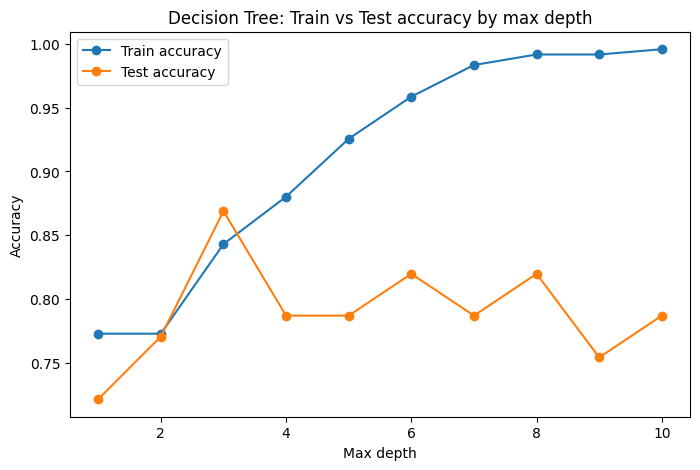

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(list(depths), train_scores, marker="o", label="Train accuracy")
plt.plot(list(depths), test_scores, marker="o", label="Test accuracy")
plt.xlabel("Max depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree: Train vs Test accuracy by max depth")
plt.legend()
plt.show()